# 4.10 IC Coding Etiquette & Excel Reporting PART 1
## Contents

#### 1. Import libraries and data

#### 2. Address security implications

#### 3. Regional segmentation of the data
   ##### - 3.1 Set up region column
   ##### - 3.2 Create a crosstab to compare spending habits in different regions
   
#### 4. Exclusion flag to exclude low-activity customers

#### 5. Profiling variables
   ##### - 5.1 Age
   ##### - 5.2 Income
   ##### - 5.3 Number of Dependants

#### 6. Visualizations to show distributions of profiles
   ##### - 6.1 Age Groups
   ##### - 6.2 Income Groups
   ##### - 6.3 Customers with Dependants
   ##### - 6.4 Visualization Loyalty vs Age group
   ##### - 6.5 Spending vs Age group
   ##### - 6.6 Loyalty with spending flag
   
#### 7. Basic Statistics on Customer-Profile level for Usage Frequency and Expenditure
   ##### - 7.1 Age Group
   ##### - 7.2 Income Group
   ##### - 7.3 Dependants Category
   
#### 8. Comparison of Customer Profiles with Regions and Departments
   ##### - 8.1 Profile by Region
   ##### - 8.2 Profile by Department Sales
   ##### - 8.3 Profiles by Frequency
   
#### 9. Visualizations
   ##### - 9.1 Busiest day of the week
   ##### - 9.2 Busiest hours of the day
   ##### - 9.3 Top 10 Departments
   ##### - 9.4 Distribution of users according to brand loyalty
   ##### - 9.5 Average Order Total by Region
   ##### - 9.6 Total Product Orders by Region
   ##### - 9.7 Ordering Habits based on Family Status and Age
   ##### - 9.8 Average expenditure based on family status and age
   ##### - 9.9 Average Frequency of Order based on family status and age
   ##### - 9.10 Comparison of Age and Income Group
   ##### - 9.11 Comparing Age Group and Dependants
   ##### - 9.12 Customer Profile Heat Map

#### 10. Export Final Data Set

#### 1. Import libraries and the last merged version of data that contains the new customers column.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create project folder path
path=r'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/11-2024 Instacart Basket Analysis'#

In [5]:
path

'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/11-2024 Instacart Basket Analysis'

In [6]:
# Import "orders_products_all.pkl"
ords_prods_all=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [7]:
# Check the output
ords_prods_all.head()

,order_id,user_id,customers_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#### 2. Address security implications

In [9]:
# Check the columns of the data frame
ords_prods_all.columns

Index(['order_id', 'user_id', 'customers_order_count', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'spending_flag',
       'avg_user_price', 'median_days_between_orders', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income'],
      dtype='object')

##### The data set contains personnaly identifiable information like first name and last name. The issue can be addresed by droping of "first_name" and "last_name" columns.

In [11]:
# Dropping "first_name" and "last_name" columns.
ords_prods_all = ords_prods_all.drop(columns=['first_name','last_name'])

In [12]:
# Check the result
ords_prods_all.head()

,order_id,user_id,customers_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,avg_user_price,median_days_between_orders,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,6.367797,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,6.367797,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,6.367797,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,6.367797,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,6.367797,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


#### 3. Regional segmentation of the data
##### 3.1. Set up region column

In [14]:
result = []

for value in ords_prods_all["state"]:
  
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Pennsylvania', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey' ]:
        result.append("Northeast")
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append("Midwest")
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida',
                   'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append("South")
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append("West")
    else:
        result.append("Not a region")

In [15]:
# Assigning the values in result[] to new column "region"
ords_prods_all['region']=result

In [16]:
# Check the result 
ords_prods_all['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [17]:
# Check the output
ords_prods_all.columns

Index(['order_id', 'user_id', 'customers_order_count', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'spending_flag',
       'avg_user_price', 'median_days_between_orders', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'region'],
      dtype='object')

##### 3.2. Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [19]:
# Create a crosstab to compare spending habits in different regions
crosstab_1 = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [20]:
# Copy crossboard to clipboard
crosstab_1.to_clipboard()

In [21]:
# Print the crosstab
print(crosstab_1)

spending_flag  High spender  Low spender
region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

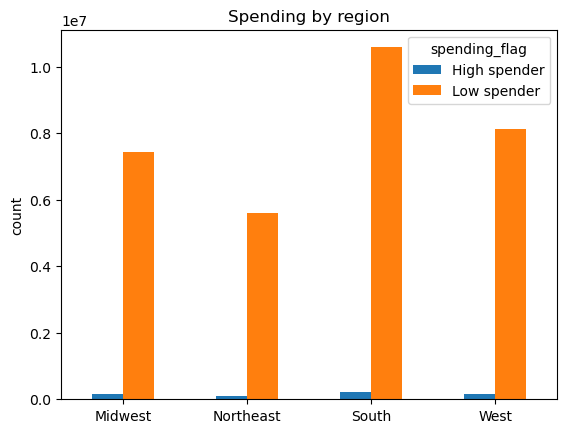

In [292]:
# Bar graph of the crosstab (for better understanding)
bar_spending__habits_by_region =  crosstab_1.plot.bar()

plt.title('Spending by region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

##### Southern Region has highest number of High Spenders as well as low spenders, followed by West then Midwest and finally Northeast. 
##### This difference may be due to the amount of population in differnt regions. However all regions have more Low spenders than High Spenders. 

In [294]:
# Exporting bar graph
bar_spending__habits_by_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_spending__habits_by_region.png'))

#### 4. Create an exclusion flag to exclude low-activity customers (with less than 5 orders)

In [26]:
# Create a flag for customers with less than 5 orders
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [27]:
# Check the output
ords_prods_all['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [28]:
# Exclude low-activity customers from the dataframe
df_excluded = ords_prods_all[ords_prods_all['activity_flag'] != 'low-activity customer']

In [29]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_excluded.pkl'))

In [30]:
# Check the dataframe (Excluding rows that have max order less than 5)
df_excluded.shape

(30964564, 28)

##### 4,44% are low-activity customers with max ordersize under 5$, were exlcuded from the data set.

#### 5. Profiling variables
##### 5.1 Segmentation by Age

In [33]:
# Creating age profiling variable
# Ensure df_excluded is an independent DataFrame
df_excluded = df_excluded.copy()
# Age segmentation: Young adult =< 25, Adult 25-45, Middle Adult 45-65, Senior 65+
df_excluded.loc[df_excluded['age'] <= 25 ,'age_group'] = 'Young Adult'
df_excluded.loc[(df_excluded['age'] > 25) & (df_excluded['age'] <= 45) ,'age_group'] = 'Adult'
df_excluded.loc[(df_excluded['age'] > 45) & (df_excluded['age'] <= 65) ,'age_group'] = 'Middle Adult'
df_excluded.loc[df_excluded['age'] > 65 ,'age_group'] = 'Senior'

In [242]:
# Check the output
age_group_counts=df_excluded['age_group'].value_counts()

In [244]:
age_group_counts

age_group
Adult           9702539
Middle Adult    9666673
Senior          7730834
Young Adult     3864518
Name: count, dtype: int64

In [35]:
# Aggregate for age group usage frequency "days_since_prior_order"
df_excluded.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
age_group                                     
Adult                     10.239318  0.0  30.0
Middle Adult              10.238339  0.0  30.0
Senior                    10.215132  0.0  30.0
Young Adult               10.218019  0.0  30.0

In [36]:
# Aggregate for age group usage frequency
df_excluded.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
age_group                            
Adult         12.117496  1.0  99999.0
Middle Adult  11.722893  1.0  99999.0
Senior        11.828109  1.0  99999.0
Young Adult   12.209359  1.0  99999.0

##### 5.2 Segmentation by Income

In [38]:
# Ensure df_excluded is an independent DataFrame
df_excluded = df_excluded.copy()

# Creating income profiling variable
df_excluded.loc[df_excluded['income'] <= 50000 ,'income_group'] = 'Low'
df_excluded.loc[(df_excluded['income'] > 50000) & (df_excluded['age'] <= 100000) ,'income_group'] = 'Middle'
df_excluded.loc[df_excluded['income'] > 100000 ,'income_group'] = 'High'

In [39]:
# Check the result
df_excluded['income_group'].value_counts()

income_group
High      14207028
Middle    13394982
Low        3362554
Name: count, dtype: int64

In [40]:
# Check the head
df_excluded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    object 
 1   user_id                     int64  
 2   customers_order_count       int64  
 3   orders_day_of_week          int64  
 4   order_hour_of_day           int64  
 5   days_since_prior_order      float64
 6   product_id                  int64  
 7   add_to_cart_order           int64  
 8   reordered                   int64  
 9   product_name                object 
 10  aisle_id                    int64  
 11  department_id               int64  
 12  prices                      float64
 13  max_order                   int64  
 14  loyalty_flag                object 
 15  spending_flag               object 
 16  avg_user_price              float64
 17  median_days_between_orders  float64
 18  frequency_flag              object 
 19  gender                  

##### 5.3 Number of dependants

In [42]:
# Ensure df_excluded is an independent DataFrame
df_excluded = df_excluded.copy()
# Create a dependants flag
df_excluded.loc[df_excluded['number_of_dependants'] == 0, 'dependants_flag'] = 'no dependants'
df_excluded.loc[df_excluded['number_of_dependants'] >= 1, 'dependants_flag'] = 'has dependants'

In [43]:
# Check value counts
dependant_counts = df_excluded['dependants_flag'].value_counts(dropna = False)

In [44]:
dependant_counts

dependants_flag
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

##### Most of the customers have a dependants. Hence we can said most of customers are families with kids.

#### 6. Visualizations to show distributions of profiles
##### 6.1 Age groups

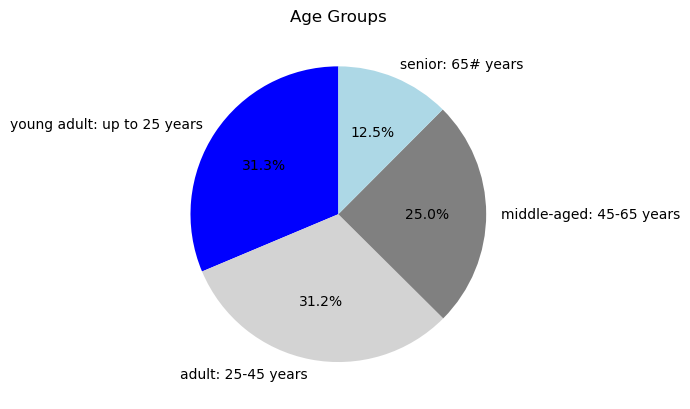

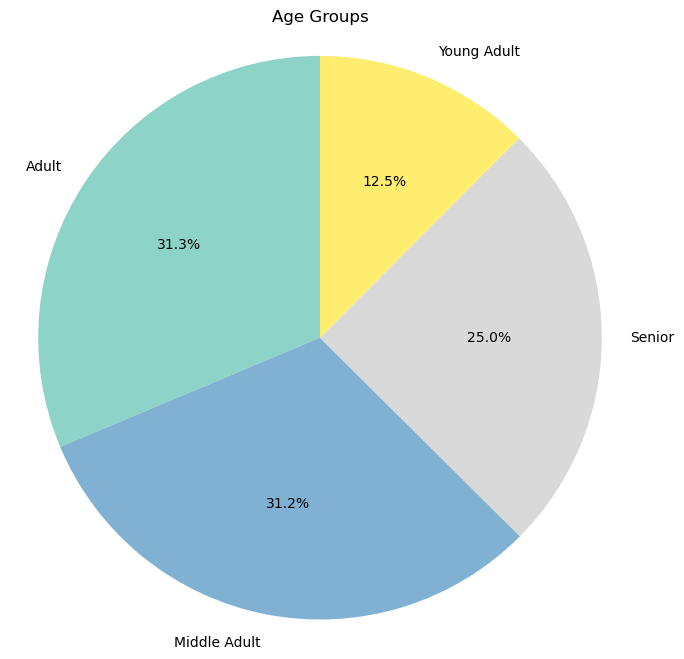

In [409]:
# Age visualization pie chart
pie_age_groups=age_group_counts.plot.pie(autopct='%1.1f%%',labels=['young adult: up to 25 years', 'adult: 25-45 years', 'middle-aged: 45-65 years', 'senior: 65# years'], startangle=90, colors=['blue','lightgrey','grey','lightblue'])
plt.ylabel('')  # Hide the y-label
plt.ylabel('')  # Hide the y-label
plt.title('Age Groups')
plt.show()


# Age groups
age_groups_all = df_excluded['age_group'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
age_groups_all.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Formatting the chart
plt.title('Age Groups')
plt.ylabel('')  # Remove the y-axis label for better visual
plt.axis('equal')  # Equal aspect ratio to ensure the pie chart is circular

# Save the chart
output_dir = os.path.join(path, '04 Analysis', 'Visualizations')
os.makedirs(output_dir, exist_ok=True)  # Ensure directories exist
plt.savefig(os.path.join(output_dir, 'age_groups_all'), bbox_inches='tight')

# Show the chart (optional)
plt.show()




In [48]:
# Export chart
pie_age_groups.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_age_groups_distribution_pie.png'))

##### 6.2 Income groups

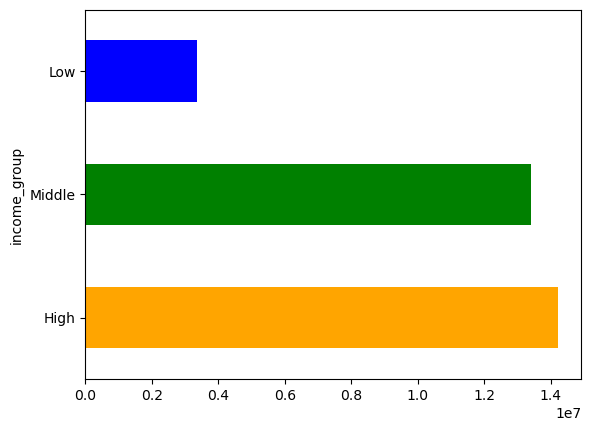

In [50]:
# Income Profile Visualization Horizontal Bar Chart
bar_income_groups = df_excluded['income_group'].value_counts().plot.barh(color = ['orange','green','blue'])

In [51]:
# Export Bar Chart
bar_income_groups.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_income_groups.png'))

##### 6.3 Customers with Dependants

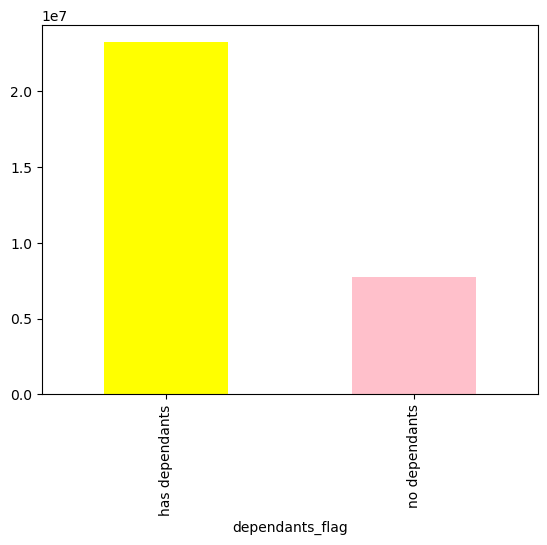

In [53]:
# 6.3.a Creating Dependants Visualization Bar Chart
dependants_flag_bar_chart=df_excluded['dependants_flag'].value_counts().plot.bar(color = ['yellow','pink'])

In [54]:
# Export Bar Chart
dependants_flag_bar_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'dependants_flag_bar_chart.png'))

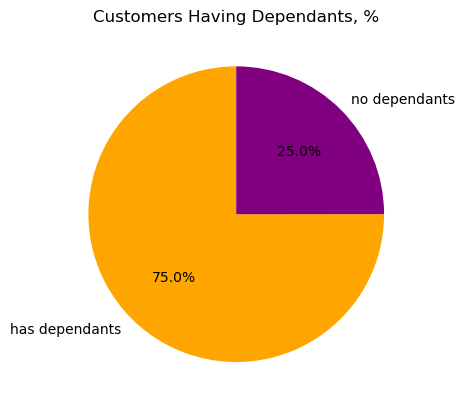

In [55]:
# 6.3.b Create a pie chart showing the percentage of dependants
dependants_pie = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['orange','purple'])
plt.ylabel('')  # Hide the y-label
plt.title('Customers Having Dependants, %')
plt.show()

In [56]:
# Export Pie Chart
dependants_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'dependants_pie.png'))

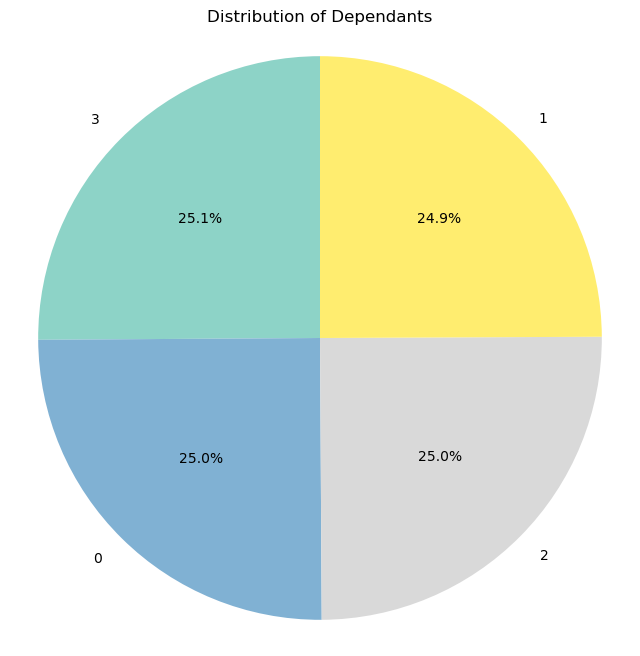

In [395]:
# How many dependants
dependants_summary = df_excluded['number_of_dependants'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
dependants_summary.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Formatting the chart
plt.title('Distribution of Dependants')
plt.ylabel('')  # Remove the y-axis label for better visual
plt.axis('equal')  # Equal aspect ratio to ensure the pie chart is circular

# Save the chart
output_dir = os.path.join(path, '04 Analysis', 'Visualizations')
os.makedirs(output_dir, exist_ok=True)  # Ensure directories exist
plt.savefig(os.path.join(output_dir, 'dependents_number_pie_chart.png'), bbox_inches='tight')

# Show the chart (optional)
plt.show()

##### 6.4 Visualization Loyalty vs Age group

In [58]:
# Crosstab loyalty with age group
loyalty_age_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['age_group'], dropna = False)
loyalty_age_cross

age_group,Adult,Middle Adult,Senior,Young Adult
loyalty_flag,,,,
Loyal customer,3208750,3217054,2577838,1280451
New customer,1496403,1504450,1202984,599858
Regular customer,4997386,4945169,3950012,1984209


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

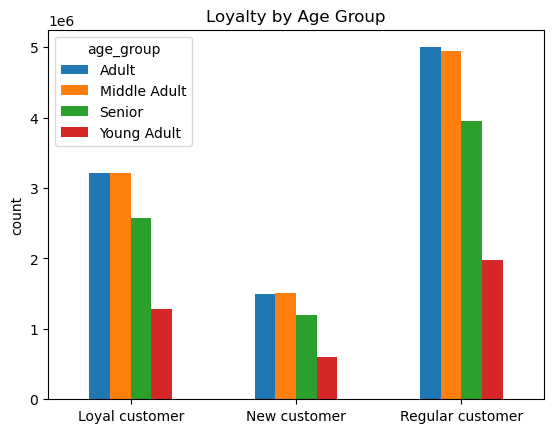

In [59]:
# Create bar chart
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [60]:
# Export the chart
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_age_group_bar.png'))

##### 6.5 Spending vs Age group

In [62]:
# Crosstab spending with age group
spending_age_cross = pd.crosstab(df_excluded['spending_flag'], df_excluded['age_group'], dropna = False)
spending_age_cross

age_group,Adult,Middle Adult,Senior,Young Adult
spending_flag,,,,
High spender,187562,195610,146251,74002
Low spender,9514977,9471063,7584583,3790516


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

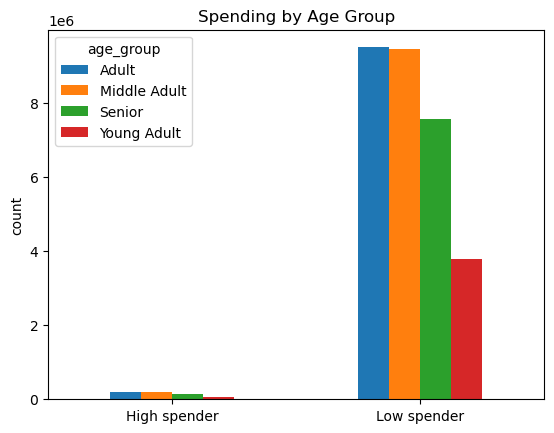

In [115]:
# Create a bar chart
spending_age_bar = spending_age_cross.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [117]:
# Export the chart
spending_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_age_group_bar.png'))

##### 6.6 Loyalty with spending flag

In [252]:
# Crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['spending_flag'], dropna = False)
loyalty_spender_cross

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,84011,4719684
Regular customer,302814,15573962


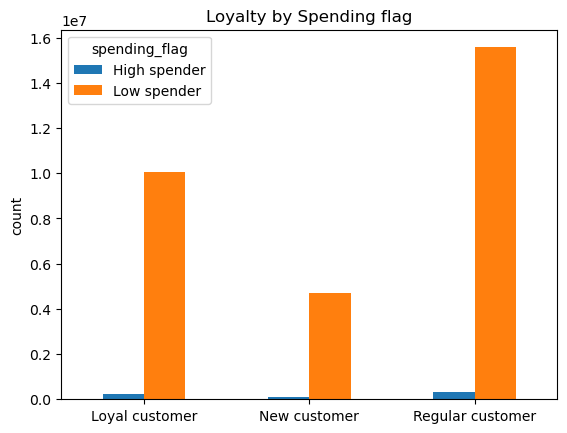

In [254]:
# Create a bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spending flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

# Export the chart
loyalty_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spender_bar.png'))

#### 7. Basic Statistics on Customer-Profile level for Usage Frequency and Expenditure

In [ ]:
# Create a bar chart spending by region
region_spending_bar = region_spending_cross.plot.bar()
plt.title('Spending by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

#### 7. Basic Statistics on Customer-Profile level for Usage Frequency and Expenditure
   ##### - 7.1 Age Group
   ##### - 7.2 Income Group
   ##### - 7.3 Dependents Category

#### 7. Basic Statistics on Customer-Profile level for Usage Frequency and Expenditure
   ##### - 7.1 Age Group
   ##### - 7.2 Income Group
   ##### - 7.3 Dependents Category

In [ ]:
# Check the columns
df_excluded.columns

In [119]:
# Check the columns
df_excluded.columns

Index(['order_id', 'user_id', 'customers_order_count', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'spending_flag',
       'avg_user_price', 'median_days_between_orders', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'region', 'activity_flag', 'age_group',
       'income_group', 'dependants_flag'],
      dtype='object')

In [121]:
# Check the head
df_excluded.head()

,order_id,user_id,customers_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,number_of_dependants,family_status,income,region,activity_flag,age_group,income_group,dependants_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,high-activity customer,Adult,Low,has dependants
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,31,2/17/2019,3,married,40423,South,high-activity customer,Adult,Low,has dependants
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,31,2/17/2019,3,married,40423,South,high-activity customer,Adult,Low,has dependants
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,31,2/17/2019,3,married,40423,South,high-activity customer,Adult,Low,has dependants
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,31,2/17/2019,3,married,40423,South,high-activity customer,Adult,Low,has dependants


In [123]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_excluded.groupby(['user_id', 'gender', 'state', 'region', 'number_of_dependants', 'family_status', 'age_group', 'customers_order_count', 'days_since_prior_order', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'activity_flag', 'dependants_flag', 'income_group', 'spending_flag'])['prices'].sum().reset_index()

In [124]:
customer_profile

,user_id,gender,state,region,number_of_dependants,family_status,age_group,customers_order_count,days_since_prior_order,orders_day_of_week,order_hour_of_day,loyalty_flag,activity_flag,dependants_flag,income_group,spending_flag,prices
0,1,Female,Alabama,South,3,married,Adult,1,0.0,2,8,New customer,high-activity customer,has dependants,Low,Low spender,31.6
1,1,Female,Alabama,South,3,married,Adult,2,15.0,3,7,New customer,high-activity customer,has dependants,Low,Low spender,35.4
2,1,Female,Alabama,South,3,married,Adult,3,21.0,3,12,New customer,high-activity customer,has dependants,Low,Low spender,28.2
3,1,Female,Alabama,South,3,married,Adult,4,29.0,4,7,New customer,high-activity customer,has dependants,Low,Low spender,26.0
4,1,Female,Alabama,South,3,married,Adult,5,28.0,4,15,New customer,high-activity customer,has dependants,Low,Low spender,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064370,206209,Female,Iowa,Midwest,3,married,Senior,9,22.0,4,15,Regular customer,high-activity customer,has dependants,High,Low spender,26.2
3064371,206209,Female,Iowa,Midwest,3,married,Senior,10,29.0,5,18,Regular customer,high-activity customer,has dependants,High,Low spender,64.7
3064372,206209,Female,Iowa,Midwest,3,married,Senior,11,30.0,4,10,Regular customer,high-activity customer,has dependants,High,Low spender,56.1
3064373,206209,Female,Iowa,Midwest,3,married,Senior,12,18.0,1,12,Regular customer,high-activity customer,has dependants,High,Low spender,131.5


In [125]:
# Rename 'prices' to 'order_price'
customer_profile.rename(columns = {'prices' : 'order_price'}, inplace = True)

In [126]:
customer_profile['order_price'].dtype

dtype('float64')

In [127]:
# 7.1 Aggregate variables for customer profiles for expenditure 
customer_agg = customer_profile.groupby('user_id').agg({'customers_order_count': ['max', 'min', 'mean'], 'order_price': ['max', 'min', 'mean']})

In [128]:
customer_agg

customers_order_count           order_price                   
                          max min  mean         max    min        mean
user_id                                                               
1                          10   1   5.5        63.1   25.0   37.570000
2                          14   1   7.5       213.1   19.0  104.685714
3                          12   1   6.5       107.2   30.7   60.116667
4                           5   1   3.0        63.4   10.8   29.540000
7                          20   1  10.5       166.7    6.3   76.910000
...                       ...  ..   ...         ...    ...         ...
206203                      5   1   3.0       216.3  126.6  169.900000
206206                     67   1  34.0       157.3    9.6   32.526866
206207                     16   1   8.5       200.8   42.8  101.931250
206208                     49   1  25.0       238.5   38.7  115.595918
206209                     13   1   7.0       131.5   11.1   70.046154

[162631 rows x 6 columns]

In [129]:
# 7.2 Aggregate variables for customer profiles for usage frequency
frequency_agg = df_excluded.groupby('user_id').agg({'customers_order_count': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [130]:
frequency_agg

customers_order_count                days_since_prior_order       \
                          max min       mean                    max  min   
user_id                                                                    
1                          10   1   5.813559                   30.0  0.0   
2                          14   1   8.035897                   30.0  0.0   
3                          12   1   6.000000                   21.0  0.0   
4                           5   1   2.888889                   21.0  0.0   
7                          20   1   9.645631                   30.0  0.0   
...                       ...  ..        ...                    ...  ...   
206203                      5   1   2.983193                   30.0  0.0   
206206                     67   1  38.007018                   15.0  0.0   
206207                     16   1   8.116592                   30.0  0.0   
206208                     49   1  25.505170                   20.0  0.0   
206209                     13   1   6.937984                   30.0  0.0   

                    
              mean  
user_id             
1        18.542373  
2        14.902564  
3        10.181818  
4        11.944444  
7        12.757282  
...            ...  
206203   23.722689  
206206    3.985965  
206207   13.278027  
206208    7.310192  
206209   18.232558  

[162631 rows x 6 columns]

In [131]:
# 7.3 Age Group usage frequency
age_frequency_agg = customer_profile.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'order_price':['mean','min','max']})       

In [132]:
age_frequency_agg

days_since_prior_order            order_price               
                               mean  min   max        mean  min       max
age_group                                                                
Adult                      9.848688  0.0  30.0  122.804145  1.0  100384.5
Middle Adult               9.835170  0.0  30.0  118.401999  1.0  100452.9
Senior                     9.818180  0.0  30.0  118.943812  1.0  100330.2
Young Adult                9.830508  0.0  30.0  123.799381  1.0  100265.6

In [133]:
# 7.4 Income group usage frequency
income_frequency_agg = customer_profile.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'order_price':['mean','min','max']})  

In [134]:
income_frequency_agg

days_since_prior_order            order_price               
                               mean  min   max        mean  min       max
income_group                                                             
High                       9.727146  0.0  30.0  173.631537  1.0  100452.9
Low                       10.419667  0.0  30.0   52.629435  1.0     875.0
Middle                     9.752250  0.0  30.0   87.742358  1.0  100264.7

In [135]:
# 7.5 Dependants & usage frequency
dependants_frequency_agg = customer_profile.groupby('dependants_flag').agg({'days_since_prior_order':['mean','min','max'],'order_price':['mean','min','max']})       

In [136]:
dependants_frequency_agg

days_since_prior_order            order_price               
                                  mean  min   max        mean  min       max
dependants_flag                                                             
has dependants                9.836853  0.0  30.0  120.109315  1.0  100452.9
no dependants                 9.827666  0.0  30.0  122.006145  1.0  100384.5

#### 8. Comparison of Customer Profiles with Regions and Departments

In [137]:
# Importing department dataframe
department = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [138]:
# Check the output
department.head(5)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [155]:
# Renaming index column as department_id
department.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [158]:
department

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [157]:
# Merging instacart dataset with department dataset
instacart_department = df_excluded.merge(department, on = 'department_id', how = 'left', indicator = True)

In [159]:
instacart_department.shape

(30964564, 33)

In [160]:
# Exporting New Merged Dataframe
instacart_department.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_department.pkl'))

In [161]:
# Importing Merged Data
instacart_department = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_department.pkl'))

In [162]:
# Check the output
instacart_department.head(5)

,order_id,user_id,customers_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_of_dependants,family_status,income,region,activity_flag,age_group,income_group,dependants_flag,department,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,3,married,40423,South,high-activity customer,Adult,Low,has dependants,beverages,both
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,3,married,40423,South,high-activity customer,Adult,Low,has dependants,dairy eggs,both
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,3,married,40423,South,high-activity customer,Adult,Low,has dependants,snacks,both
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,3,married,40423,South,high-activity customer,Adult,Low,has dependants,snacks,both
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,3,married,40423,South,high-activity customer,Adult,Low,has dependants,household,both


In [163]:
instacart_department['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

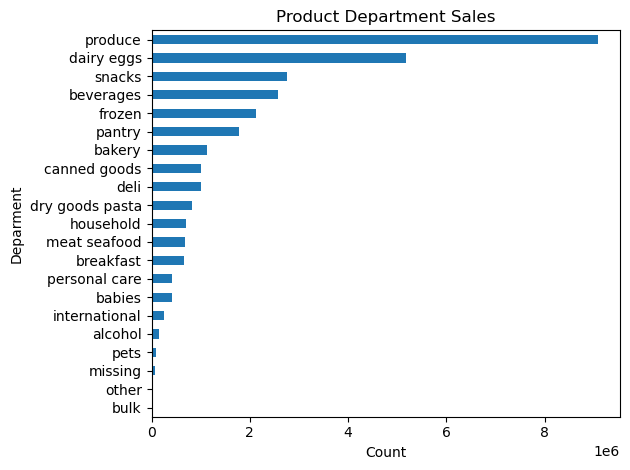

In [164]:
# Creating bar chart of Departments
dept_bar = instacart_department['department'].value_counts().sort_values(ascending= True).plot.barh()
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Deparment')
plt.tight_layout()

In [165]:
# Exporting Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'departments_product_bar.png'))

##### 8.1 Profile by region

In [166]:
# 8.1.a Comparing age_group with region
age_region_comparison = pd.crosstab(instacart_department['age_group'],instacart_department['region'],dropna = False)

In [167]:
age_region_comparison

region,Midwest,Northeast,South,West
age_group,,,,
Adult,2286075,1693019,3261271,2462174
Middle Adult,2277677,1697267,3185845,2505884
Senior,1799606,1394490,2549034,1987704
Young Adult,898155,679909,1314989,971465


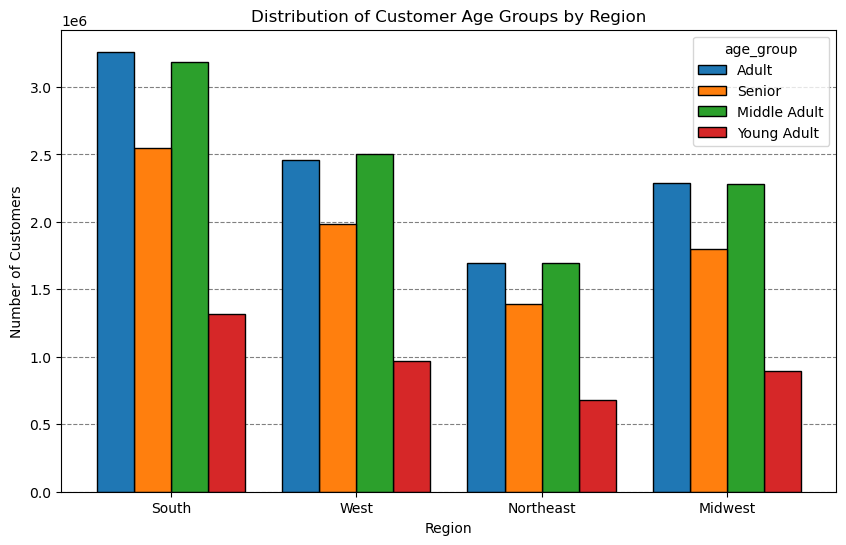

In [168]:
# Plotting Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_department, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

##### 8.1.b Comparing income_group with regions

In [169]:
income_region_comparison = pd.crosstab(instacart_department['income_group'],instacart_department['region'],dropna = False)

In [170]:
income_region_comparison

region,Midwest,Northeast,South,West
income_group,,,,
High,3400093,2516484,4663571,3626880
Low,783764,587137,1142572,849081
Middle,3077656,2361064,4504996,3451266


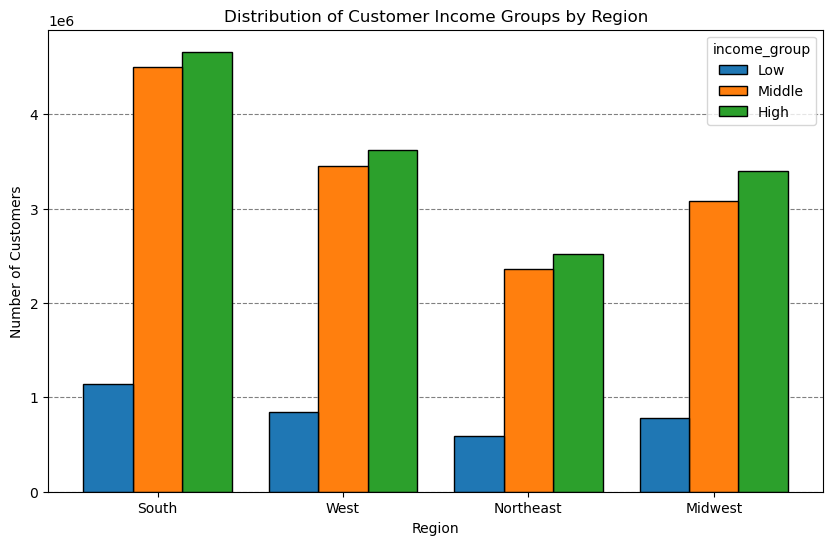

In [171]:
# Plotting Histogram for income group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_department, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Customer Income Groups by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')

# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

##### 8.2 Customer Profile by Departments Sales

In [172]:
##### 8.2.a Comparing age group and department

In [173]:
age_department_comparison = pd.crosstab(instacart_department['department'],instacart_department['age_group'],dropna = False)

In [174]:
age_department_comparison

age_group,Adult,Middle Adult,Senior,Young Adult
department,,,,
alcohol,45481,45267,34691,19188
babies,130299,128697,100162,51234
bakery,352102,350395,278458,139873
beverages,797642,809502,646414,318343
breakfast,209410,210472,165491,85477
bulk,10421,10388,8336,4306
canned goods,317972,315850,251940,126312
dairy eggs,1630318,1608332,1291039,647493
deli,315618,313198,250463,124555


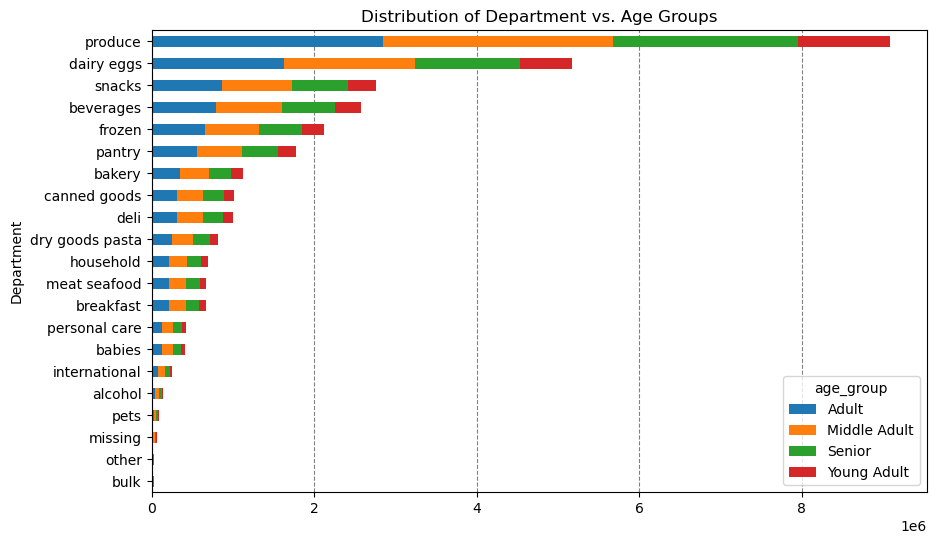

In [375]:
age_department_comparison = pd.crosstab(instacart_department['department'],instacart_department['age_group'],dropna = False)
# Age Group_department Bar Chart
# Calculate the total frequency for each department and sort by total frequency
age_department_comparison['total'] = age_department_comparison.sum(axis=1)
age_department_sorted = age_department_comparison.sort_values(by='total', ascending=True).drop(columns=['total'])

# Dependants Flag Department Bar Chart
age_department_comparison = age_department_sorted.plot(kind='barh', stacked=True, figsize=(10, 6))

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='x', color='gray', linestyle='dashed')  # Adjusted grid to align with barh orientation

# General formatting
plt.title('Distribution of Department vs. Age Groups')
plt.xlabel('')
plt.ylabel('Department')

# Exporting bar chart
os.makedirs(os.path.join(path, '04 Analysis', 'Visualizations'), exist_ok=True)  # Ensure directories exist
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_age.png'), bbox_inches='tight')

# Show the chart (optional)
plt.show()

##### 8.2.b Comparing Income group and Department

In [176]:
income_department_comparison = pd.crosstab(instacart_department['department'],instacart_department['income_group'],dropna = False)

In [177]:
income_department_comparison

income_group,High,Low,Middle
department,,,
alcohol,69142,18047,57438
babies,196696,29240,184456
bakery,527703,106757,486368
beverages,1126437,383121,1062343
breakfast,297594,91408,281848
bulk,14218,4676,14557
canned goods,485226,78975,447873
dairy eggs,2406160,502363,2268659
deli,462089,106448,435297


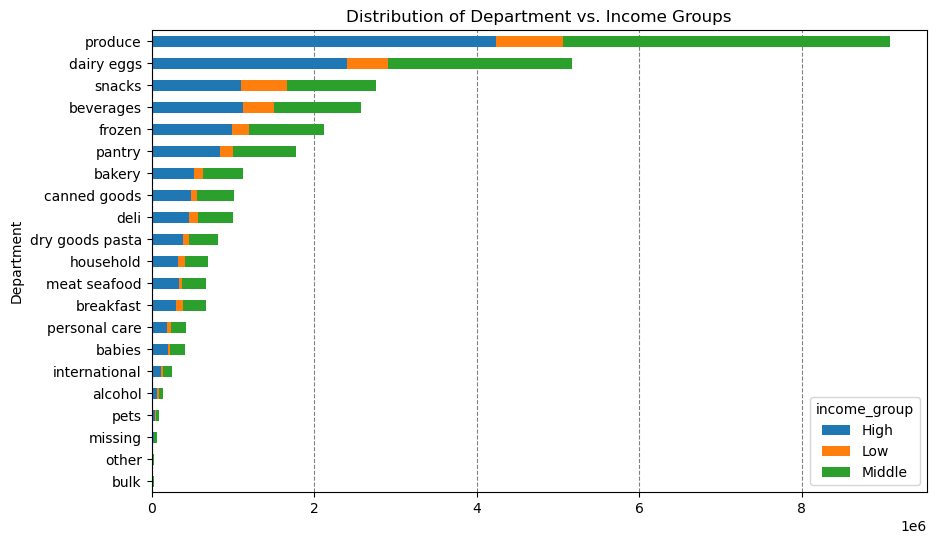

In [365]:
# Income Group_department Bar Chart
# Calculate the total frequency for each department and sort by total frequency
income_department_comparison['total'] = income_department_comparison.sum(axis=1)
income_department__sorted = income_department_comparison.sort_values(by='total', ascending=True).drop(columns=['total'])

# Dependants Flag Department Bar Chart
department_income = income_department__sorted.plot(kind='barh', stacked=True, figsize=(10, 6))

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='x', color='gray', linestyle='dashed')  # Adjusted grid to align with barh orientation

# General formatting
plt.title('Distribution of Department vs. Income Groups')
plt.xlabel('')
plt.ylabel('Department')

# Exporting bar chart
os.makedirs(os.path.join(path, '04 Analysis', 'Visualizations'), exist_ok=True)  # Ensure directories exist
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_income.png'), bbox_inches='tight')

# Show the chart (optional)
plt.show()

#####  Top 5 departments for all income groups are produce, dairy eggs, snacks, beverages and frozen. 

##### 8.2.c Comparing Dependants Flag and Department

In [181]:
dependants_department_comparison = pd.crosstab(instacart_department['department'],instacart_department['dependants_flag'],dropna = False)

In [182]:
dependants_department_comparison

dependants_flag,has dependants,no dependants
department,,
alcohol,107800,36827
babies,307064,103328
bakery,839433,281395
beverages,1926560,645341
breakfast,504418,166432
bulk,25451,8000
canned goods,761054,251020
dairy eggs,3882806,1294376
deli,750452,253382


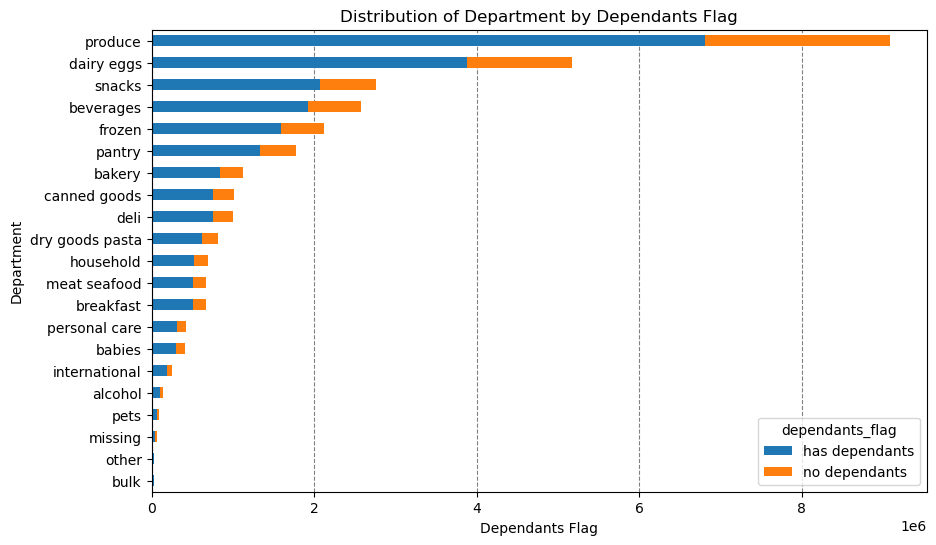

In [363]:
# Calculate the total frequency for each department and sort by total frequency
dependants_department_comparison['total'] = dependants_department_comparison.sum(axis=1)
dependants_department_sorted = dependants_department_comparison.sort_values(by='total', ascending=True).drop(columns=['total'])

# Dependants Flag Department Bar Chart
bar_department_dependant = dependants_department_sorted.plot(kind='barh', stacked=True, figsize=(10, 6))

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='x', color='gray', linestyle='dashed')  # Adjusted grid to align with barh orientation

# General formatting
plt.title('Distribution of Department by Dependants Flag')
plt.xlabel('Dependants Flag')
plt.ylabel('Department')

# Exporting bar chart
os.makedirs(os.path.join(path, '04 Analysis', 'Visualizations'), exist_ok=True)  # Ensure directories exist
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_dependant.png'), bbox_inches='tight')

# Show the chart (optional)
plt.show()


##### 8.3 Profiles by Frequency

##### 8.3.a Income Groups

In [186]:
income_freq = pd.crosstab(instacart_department['income_group'],instacart_department['frequency_flag'],dropna = False)

In [187]:
income_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High,10251141,964659,2991228
Low,2312595,291060,758899
Middle,9645158,931698,2818126


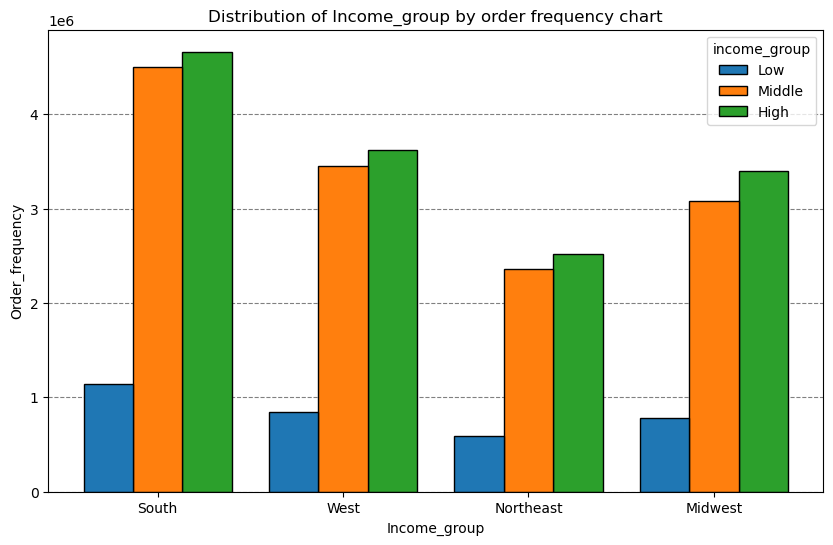

In [340]:
# Income Group and Order frequency Bar Chart
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_department, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Income_group by order frequency chart')
plt.ylabel('Order_frequency')
plt.xlabel('Income_group')
bar_income_freq=plt.gcf()

# Exporting bar chart
bar_income_freq.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_frequency.png'))



##### 8.3.b Age Group Frequency Comparison

In [191]:
# Creating crosstab for age and frequency
age_freq = pd.crosstab(instacart_department['age_group'], instacart_department['frequency_flag'], dropna = False)
age_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,6946842,685584,2070113
Middle Adult,6922333,688835,2055505
Senior,5555730,541997,1633107
Young Adult,2783989,271001,809528


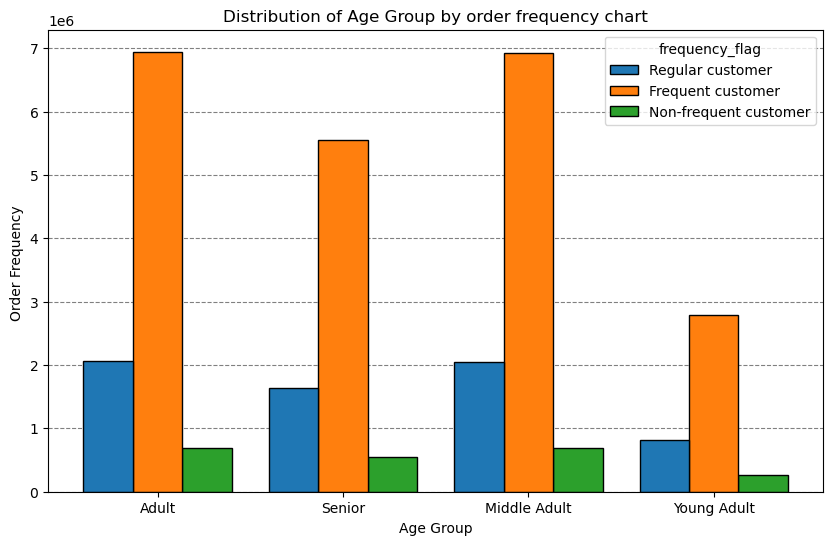

In [352]:
# Age Group and Order frequency Bar Chart
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_department, x='age_group', hue='frequency_flag', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Age Group by order frequency chart')
plt.ylabel('Order Frequency ')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
bar_age_order_frequency=plt.gcf()

# Exporting bar chart
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_age_order_freqeuncy1.png'), bbox_inches='tight')

##### 8.3.c Family status Frequency Comparison

In [193]:
# Creating crosstab for family status and frequency
family_status_freq = pd.crosstab(instacart_department['family_status'], instacart_department['frequency_flag'], dropna = False)
family_status_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
family_status,,,
divorced/widowed,1904044,184799,556428
living with parents and siblings,1077331,104243,299598
married,15587481,1543064,4613166
single,3640038,355311,1099061


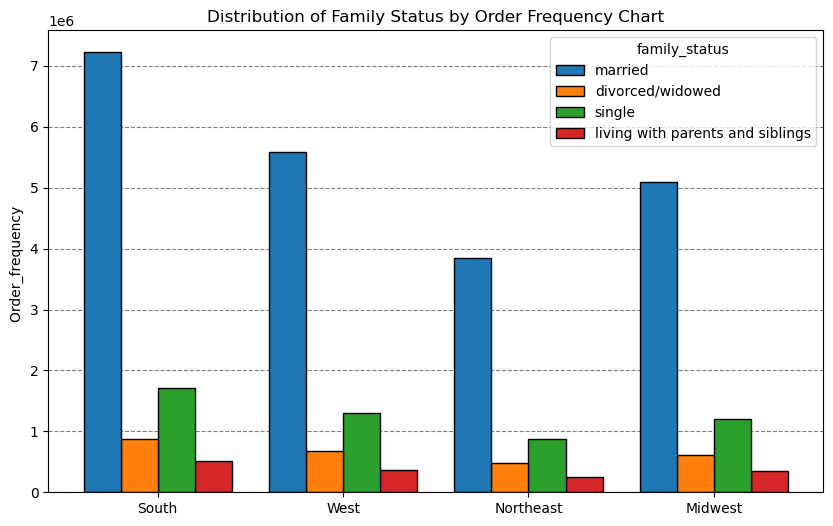

In [351]:
# Family Status Frequenz Plotting Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_department, x='region', hue='family_status', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Family Status by Order Frequency Chart')
plt.ylabel('Order_frequency ')
plt.xlabel('')
plt.xticks(rotation=0)
bar_family_status_region = plt.gcf()

# Exporting bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_family_status_freq.png'), bbox_inches='tight')
plt.show()

##### 8.3.d Departments and Frequency Comparison

In [195]:
# Creating crosstab for department and frequency
department_freq = pd.crosstab(instacart_department['department'], instacart_department['frequency_flag'], dropna = False)
department_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,105534,9751,29342
babies,327033,18189,65170
bakery,807009,77236,236583
beverages,1837479,186820,547602
breakfast,477092,48776,144982
bulk,25834,1829,5788
canned goods,694985,82079,235010
dairy eggs,3785080,340786,1051316
deli,708148,74288,221398


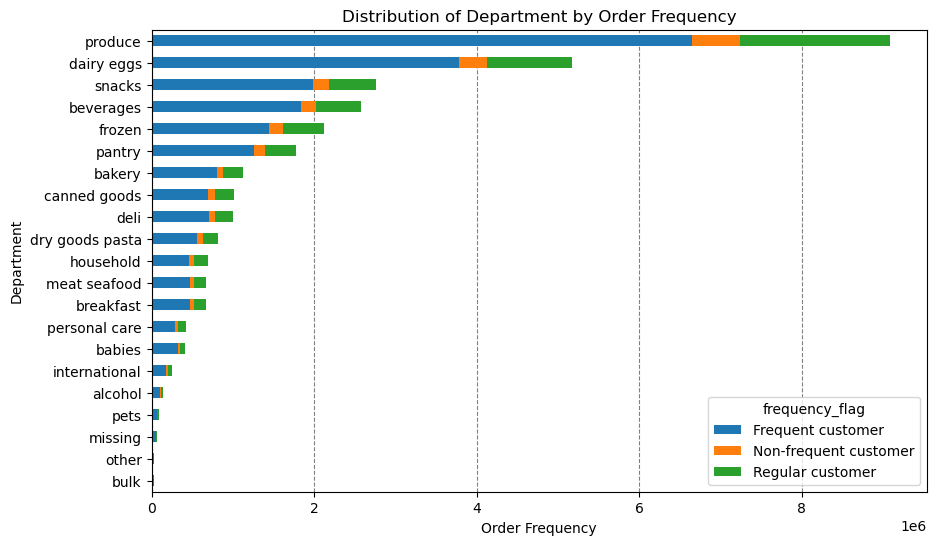

In [290]:
import os
import matplotlib.pyplot as plt

# Calculate the total frequency for each department and sort by total frequency
department_freq['total'] = department_freq.sum(axis=1)
department_freq_sorted = department_freq.sort_values(by='total', ascending=True).drop(columns=['total'])

# Create a Department Frequency Bar Chart
bar_department_frequency = department_freq_sorted.plot(kind='barh', stacked=True, figsize=(10, 6))

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='x', color='gray', linestyle='dashed')  # Adjusted grid to align with barh orientation

# General formatting
plt.title('Distribution of Department by Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Department')

# Exporting bar chart
os.makedirs(os.path.join(path, '04 Analysis', 'Visualizations'), exist_ok=True)  # Ensure directories exist
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_frequency.png'), bbox_inches='tight')

# Show the chart (optional)
plt.show()

##### 8.4 Distribution Family status by Region

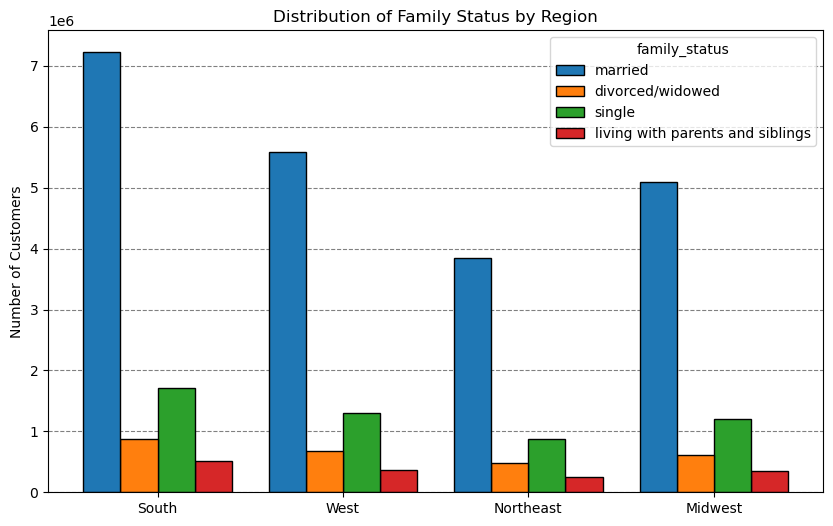

In [332]:
# Creating crosstab for family status and frequency
family_status_region = pd.crosstab(instacart_department['family_status'], instacart_department['region'], dropna = False)

# Family Status by Region Plotting Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_department, x='region', hue='family_status', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Family Status by Region')
plt.ylabel('Number of Customers')
plt.xlabel('')
plt.xticks(rotation=0)
bar_family_status_region = plt.gcf()

# Exporting bar chart
bar_family_status_region.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_family_status_region.png'), bbox_inches = 'tight')
plt.show()

##### 8.14 Comparison Departments by Family status

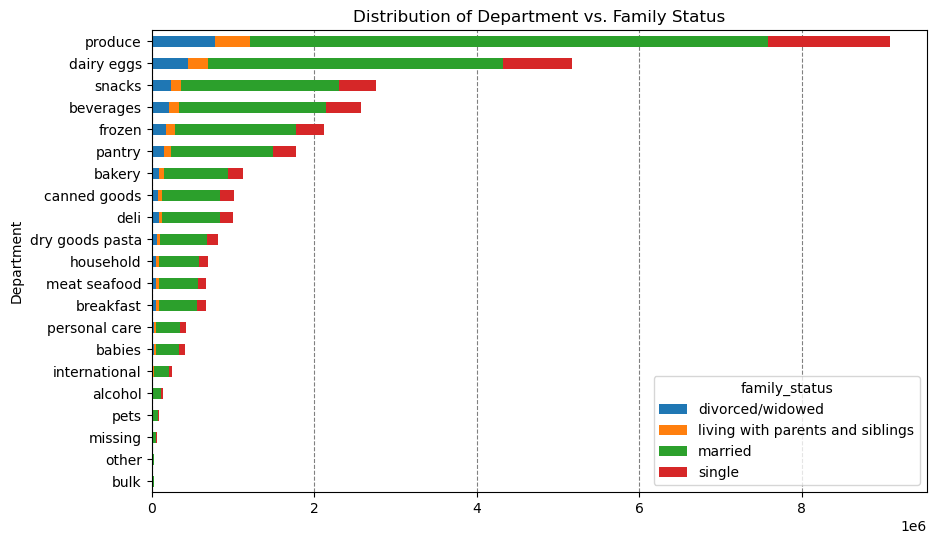

In [383]:
# Creating crosstab for family status and department
department_family = pd.crosstab(instacart_department['department'], instacart_department['family_status'], dropna = False)

# Calculate the total frequency for each department and sort by total frequency
department_family['total'] = department_family.sum(axis=1)
department_family_sorted = department_family.sort_values(by='total', ascending=True).drop(columns=['total'])

# Create a Department Frequency Bar Chart
department_family = department_family_sorted.plot(kind='barh', stacked=True, figsize=(10, 6))

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='x', color='gray', linestyle='dashed')  # Adjusted grid to align with barh orientation

# General formatting
plt.title('Distribution of Department vs. Family Status')
plt.xlabel('')
plt.ylabel('Department')

# Exporting bar chart
os.makedirs(os.path.join(path, '04 Analysis', 'Visualizations'), exist_ok=True)  # Ensure directories exist
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_family.png'), bbox_inches='tight')

# Show the chart (optional)
plt.show()

### 9. Visualizations

##### - 9.1 Busiest day of the week

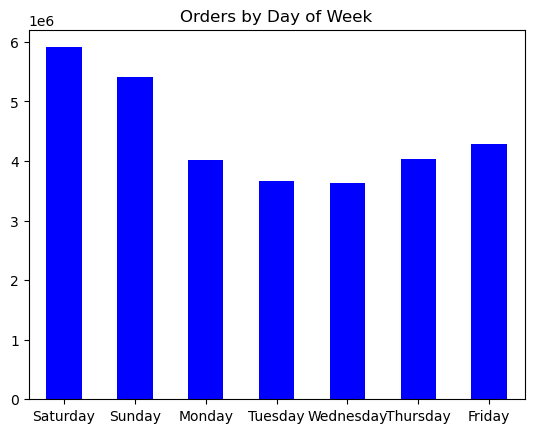

In [197]:
# Create a bar chart showing busiest days of the week
bar_orders_dow = df_excluded['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'blue')
bar_orders_dow.set_title('Orders by Day of Week')
bar_orders_dow.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
bar_orders_dow.set_xlabel("")

# Export bar chart
bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

  ##### 9.2 Busiest hours of the day

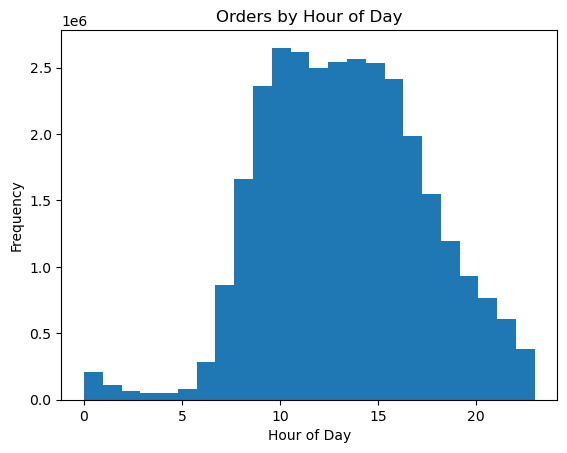

In [198]:
# Create a histogram showing the distribution of sales by order hour of the day
hist_orders_hod=df_excluded['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')

# Export histogram
hist_orders_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hod.png'))

##### 9.3 Top 10 Departments

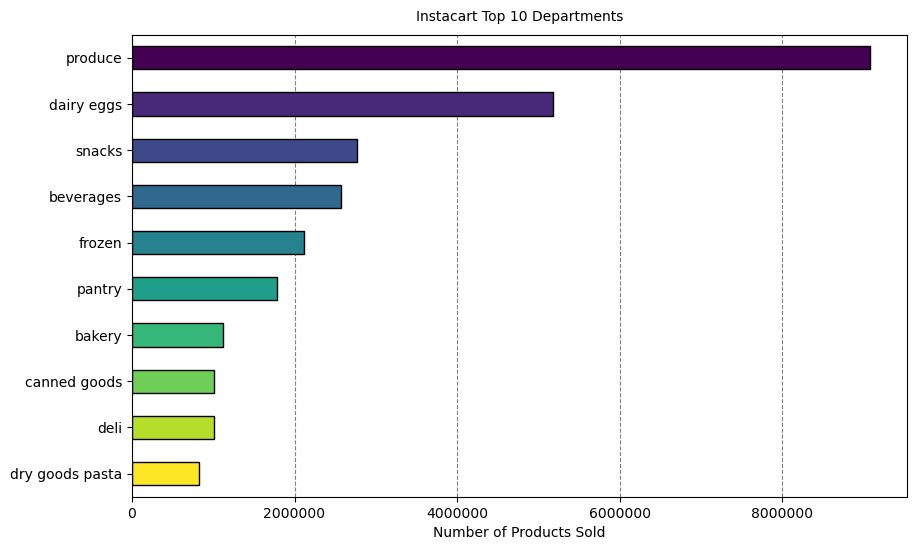

In [262]:
# Create horizontal bar chart 
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette
fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

bar_top_ten_departments = instacart_department['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors,                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('Number of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()

# Export bar chart
bar_top_ten_departments.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_top ten_departments.png'), bbox_inches = 'tight')

##### 9.4 Distribution of users according to brand loyalty

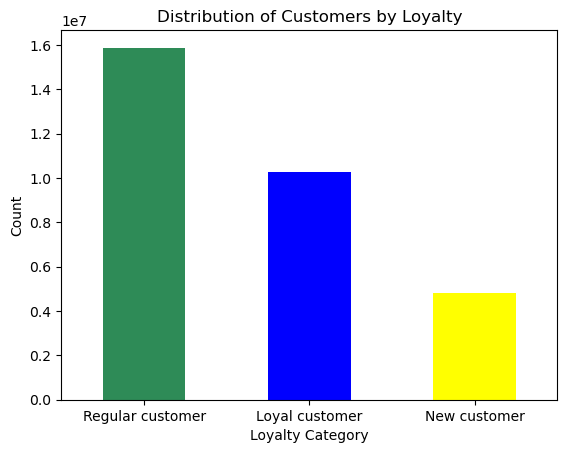

In [256]:
# Create bar chart on 'loyalty_flag' frequency

# Plot chart
bar_loyalty = df_excluded['loyalty_flag'].value_counts().plot.bar(color = ['seagreen', 'blue', 'yellow'])

# Set formatting
plt.title('Distribution of Customers by Loyalty')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.xlabel('Loyalty Category')
bar_loyalty = plt.gcf()

# Export the chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'), bbox_inches = 'tight')

##### 9.5 Ordering Habits based on Customer's Region

In [201]:
# Average order_total per region
region_avg_order_price = customer_profile.groupby('region')['order_price'].mean().sort_values(ascending = False).reset_index()
region_avg_order_price

,region,order_price
0,Midwest,128.027710
1,South,122.343512
2,Northeast,116.765440
3,West,114.091558


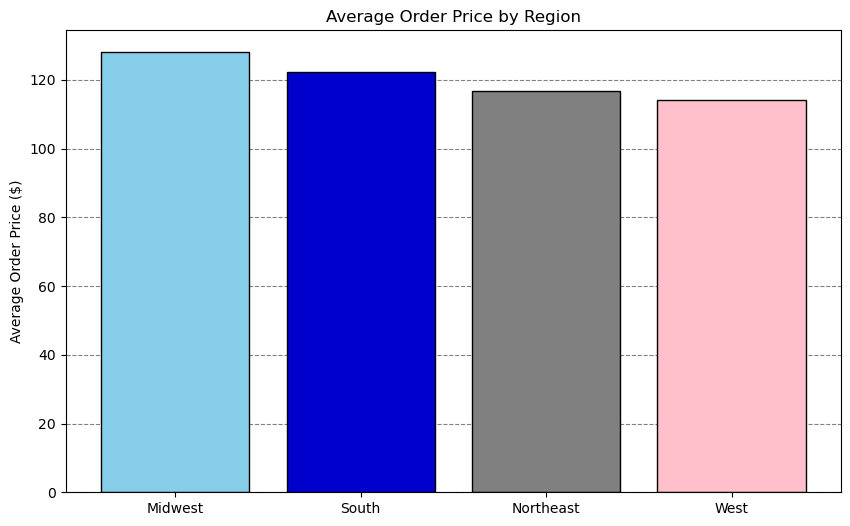

In [202]:
# Create a chart. 
# Set up formatting
# colors = ['skyblue', 'mediumblue', 'grey', 'pink'], # colour palette
plt.figure(figsize=(10, 6))

# Plot bar
bar_order_price_region = plt.bar(region_avg_order_price['region'], 
               region_avg_order_price['order_price'], 
               color = ['skyblue', 'mediumblue', 'grey', 'pink'],
               edgecolor='black', 
               zorder=2, 
               alpha = 1)
plt.title("Average Order Price by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Price ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')

# Export the chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'average_order_by_region.png'), bbox_inches = 'tight')

##### 9.6 Total Product Orders by Region

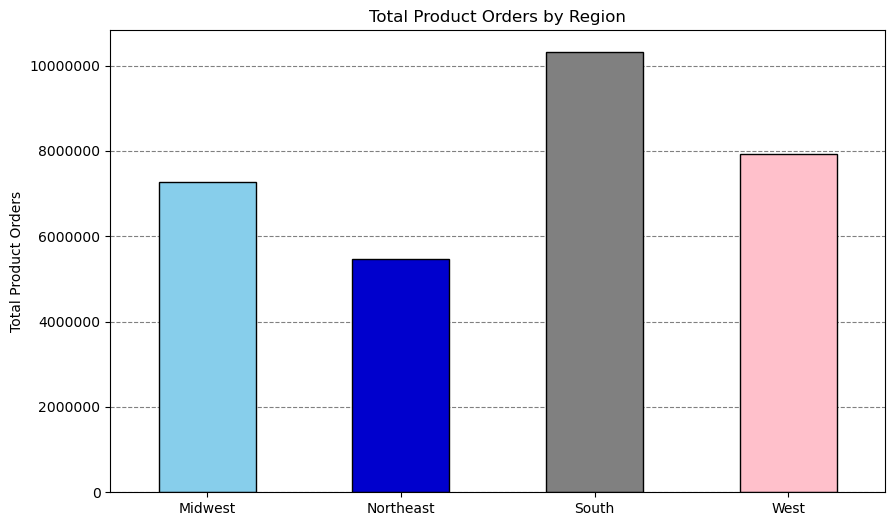

In [203]:
# Set up formatting
# colors = ['sykblue', '#´mediumblue', 'grey', 'pink'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Create Plot bars
bar_total_orders_by_region = df_excluded['region'].value_counts().sort_index().plot.bar(color = ['skyblue', 'mediumblue', 'grey', 'pink'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')

# Export the chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'total_orders_by_region.png'), bbox_inches = 'tight')

##### 9.7 Ordering Habits based on Family Status and Age

In [207]:
order_total_age_family = customer_profile.groupby(['family_status','age_group'])['order_price'].mean().unstack(fill_value=0)
order_total_age_family

age_group,Adult,Middle Adult,Senior,Young Adult
family_status,,,,
divorced/widowed,0.00000,103.892738,121.659738,0.000000
living with parents and siblings,0.00000,0.000000,0.000000,110.954354
married,121.36667,120.126258,118.058775,131.520521
single,127.07307,117.336329,0.000000,132.016957


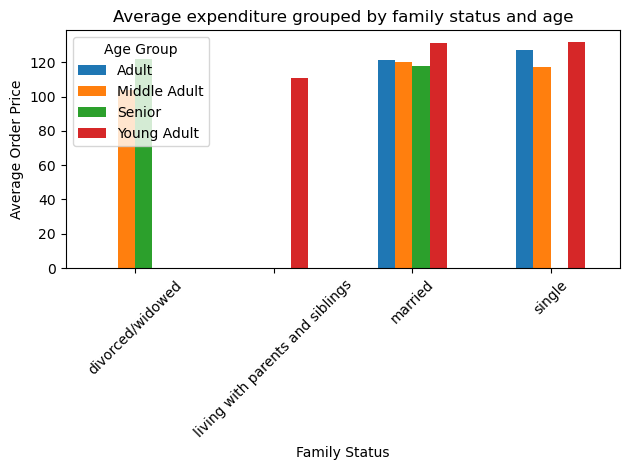

In [208]:
# Plot the grouped bar chart
order_total_age_family.plot(kind='bar', stacked=False)
plt.title('Average expenditure grouped by family status and age')
plt.xlabel('Family Status')
plt.ylabel('Average Order Price')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
order_total_age_family = plt.gcf()
order_total_age_family.savefig(os.path.join(path,'04 Analysis','Visualizations','order_price_age_family_status.png'), dpi=300, bbox_inches='tight')

##### 9.8 Average expenditure based on family status and age

In [209]:
freq_age_family = customer_profile.groupby(['family_status','age_group'])['days_since_prior_order'].mean().unstack(fill_value=0)
freq_age_family

age_group,Adult,Middle Adult,Senior,Young Adult
family_status,,,,
divorced/widowed,0.000000,9.720825,9.836902,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,9.762445
married,9.848650,9.865990,9.812079,9.807878
single,9.848804,9.754516,0.000000,9.968357


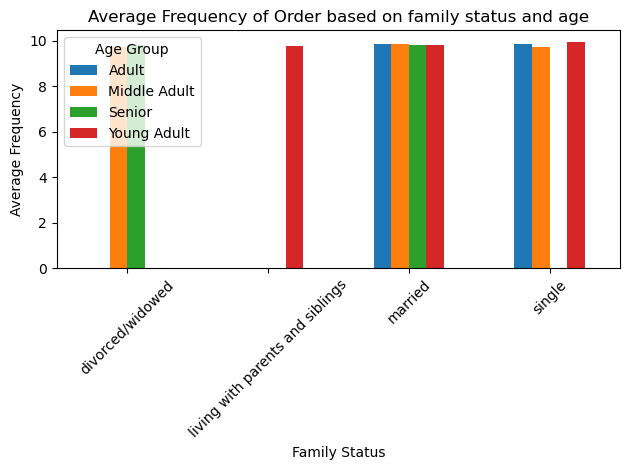

In [210]:
# Plot the grouped bar chart
freq_age_family.plot(kind='bar', stacked=False)
plt.title('Average Frequency of Order based on family status and age')
plt.xlabel('Family Status')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
freq_age_family_status = plt.gcf()
freq_age_family_status.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freq_age_family_status.png'), dpi=300, bbox_inches='tight')

 ##### 9.9 Average Frequency of Order based on family status and age

In [215]:
income_agg = customer_profile.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'order_price':['mean','min','max']})  

In [217]:
income_agg

days_since_prior_order            order_price               
                               mean  min   max        mean  min       max
income_group                                                             
High                       9.727146  0.0  30.0  173.631537  1.0  100452.9
Low                       10.419667  0.0  30.0   52.629435  1.0     875.0
Middle                     9.752250  0.0  30.0   87.742358  1.0  100264.7

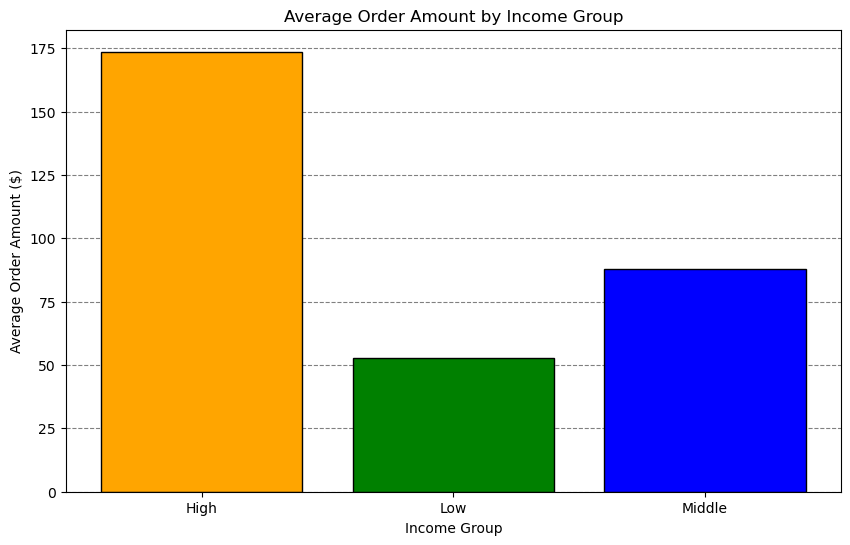

In [219]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(income_agg.index, income_agg['order_price', 'mean'], color=['orange', 'green', 'blue'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
# Export the chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','instacart_average_order_amount_by_income.png'), bbox_inches = 'tight')

##### 9.10 Comparison of Age and Income Group

In [222]:
# Comparing Age Group and Income Group
age_income_comparison = pd.crosstab (df_excluded['age_group'], df_excluded['income_group'],dropna = False)
age_income_comparison

income_group,High,Low,Middle
age_group,,,
Adult,1932025,1314007,6456507
Middle Adult,6735506,811913,2119254
Senior,5413785,637365,1679684
Young Adult,125712,599269,3139537


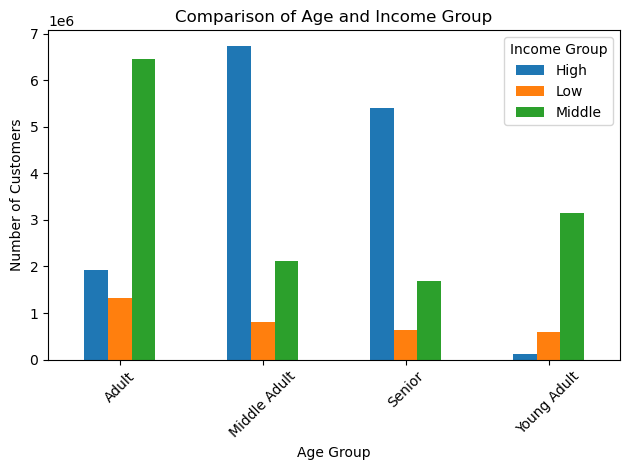

In [223]:
# Plot the  bar chart
age_income_comparison.plot(kind='bar', stacked=False)
plt.title('Comparison of Age and Income Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.tight_layout()
age_income_comparison = plt.gcf()

# Export the chart
age_income_comparison.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_income_comparison.png'), dpi=300, bbox_inches='tight')

##### 9.11 Comparing Age Group and Dependants

In [225]:
# Comparing Age Group and Dependants
age_depend_comparison = pd.crosstab (df_excluded['age_group'], df_excluded['dependants_flag'],dropna = False)
age_depend_comparison

dependants_flag,has dependants,no dependants
age_group,,
Adult,7270139,2432400
Middle Adult,7218340,2448333
Senior,5825113,1905721
Young Adult,2911291,953227


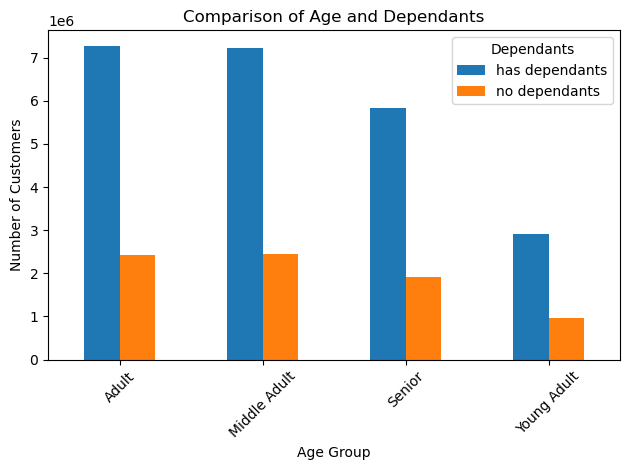

In [226]:
# Plot the  bar chart
age_depend_comparison.plot(kind='bar', stacked=False)
plt.title('Comparison of Age and Dependants')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Dependants')
plt.tight_layout()
age_depend_comparison = plt.gcf()
# Export the chart
age_depend_comparison.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_dependands_comparison.png'), dpi=300, bbox_inches='tight')

##### 9.12 Customer Profile Heat Map

In [228]:
customer_profile_new = customer_profile.groupby(['family_status','dependants_flag','age_group','income_group']).size().unstack(fill_value=0)
customer_profile_new 

income_group                                                     High     Low  \
family_status                    dependants_flag age_group                      
divorced/widowed                 no dependants   Middle Adult   48188    7971   
                                                 Senior        127246   20664   
living with parents and siblings has dependants  Young Adult     4535   26595   
married                          has dependants  Adult         137606  120370   
                                                 Middle Adult  474550   80882   
                                                 Senior        386841   65470   
                                                 Young Adult     4154   27735   
single                           no dependants   Adult          46122   40873   
                                                 Middle Adult  114664   19451   
                                                 Young Adult     3040   18529   

income_group                                                   Middle  
family_status                    dependants_flag age_group             
divorced/widowed                 no dependants   Middle Adult   16222  
                                                 Senior         41038  
living with parents and siblings has dependants  Young Adult   114247  
married                          has dependants  Adult         458236  
                                                 Middle Adult  158924  
                                                 Senior        127517  
                                                 Young Adult   108959  
single                           no dependants   Adult         154175  
                                                 Middle Adult   36238  
                                                 Young Adult    73333

In [229]:
customer_profile_transposed = customer_profile_new.T
customer_profile_transposed

family_status   divorced/widowed         living with parents and siblings  \
dependants_flag    no dependants                           has dependants   
age_group           Middle Adult  Senior                      Young Adult   
income_group                                                                
High                       48188  127246                             4535   
Low                         7971   20664                            26595   
Middle                     16222   41038                           114247   

family_status          married                                         single  \
dependants_flag has dependants                                  no dependants   
age_group                Adult Middle Adult  Senior Young Adult         Adult   
income_group                                                                    
High                    137606       474550  386841        4154         46122   
Low                     120370        80882   65470       27735         40873   
Middle                  458236       158924  127517      108959        154175   

family_status                             
dependants_flag                           
age_group       Middle Adult Young Adult  
income_group                              
High                  114664        3040  
Low                    19451       18529  
Middle                 36238       73333

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


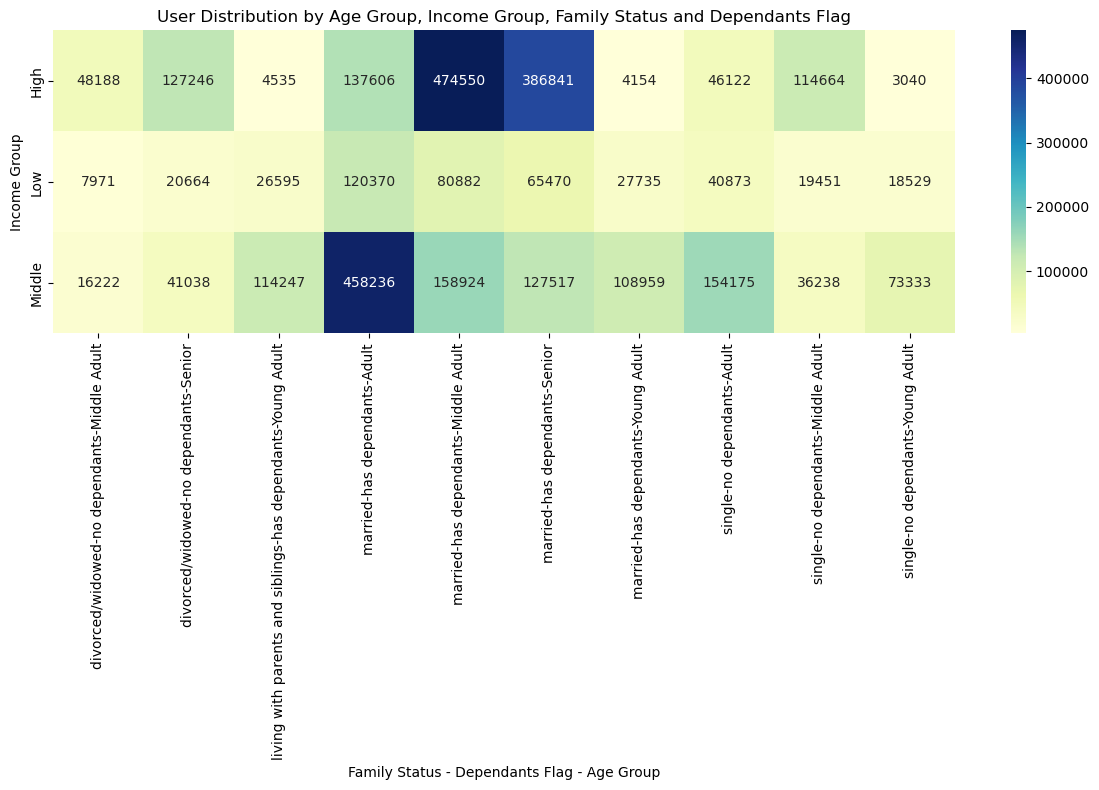

In [411]:
# Create hitmap
plt.figure(figsize=(12, 8))

sns.heatmap(customer_profile_transposed, annot=True, fmt='d', cmap='YlGnBu')
plt.title('User Distribution by Age Group, Income Group, Family Status and Dependants Flag')
plt.ylabel('Income Group')
plt.xlabel('Family Status - Dependants Flag - Age Group')
plt.tight_layout()
# Export chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'user_distribution_heatmap.png'), bbox_inches='tight')
plt.show()

##### 9.13 Comparison Region and Dependants

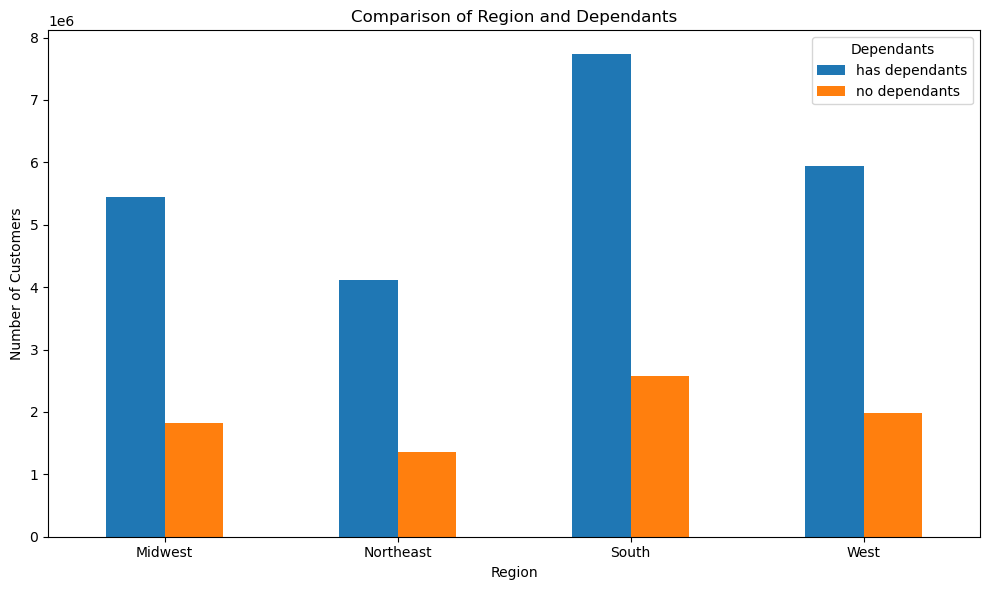

In [307]:
# Comparing Region and Dependants
region_depend_comparison = pd.crosstab (df_excluded['region'], df_excluded['dependants_flag'],dropna = False)

# Plot the  bar chart
region_depend_comparison.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Region and Dependants')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Dependants')
plt.tight_layout()
region_depend_comparison = plt.gcf()

# Export the chart
region_depend_comparison.savefig(os.path.join(path,'04 Analysis','Visualizations', 'region_dependands_comparison.png'), dpi=300, bbox_inches='tight')



#### 10. Export Final Data Set

In [232]:
instacart_department.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart_final.pkl'))